# Example for using the Python/SymPy tool chain with the signalflowgrapher
Hanspeter Schmid, 15.8.2023

In [1]:
%matplotlib widget
import sympy
from sympy import *
init_printing(use_latex='mathjax')

## Draw a signal-flow graph
signalflowgrapher file `sfg.json`

Screen shot:

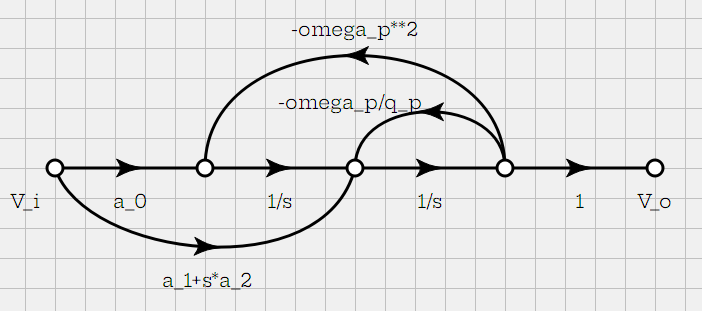
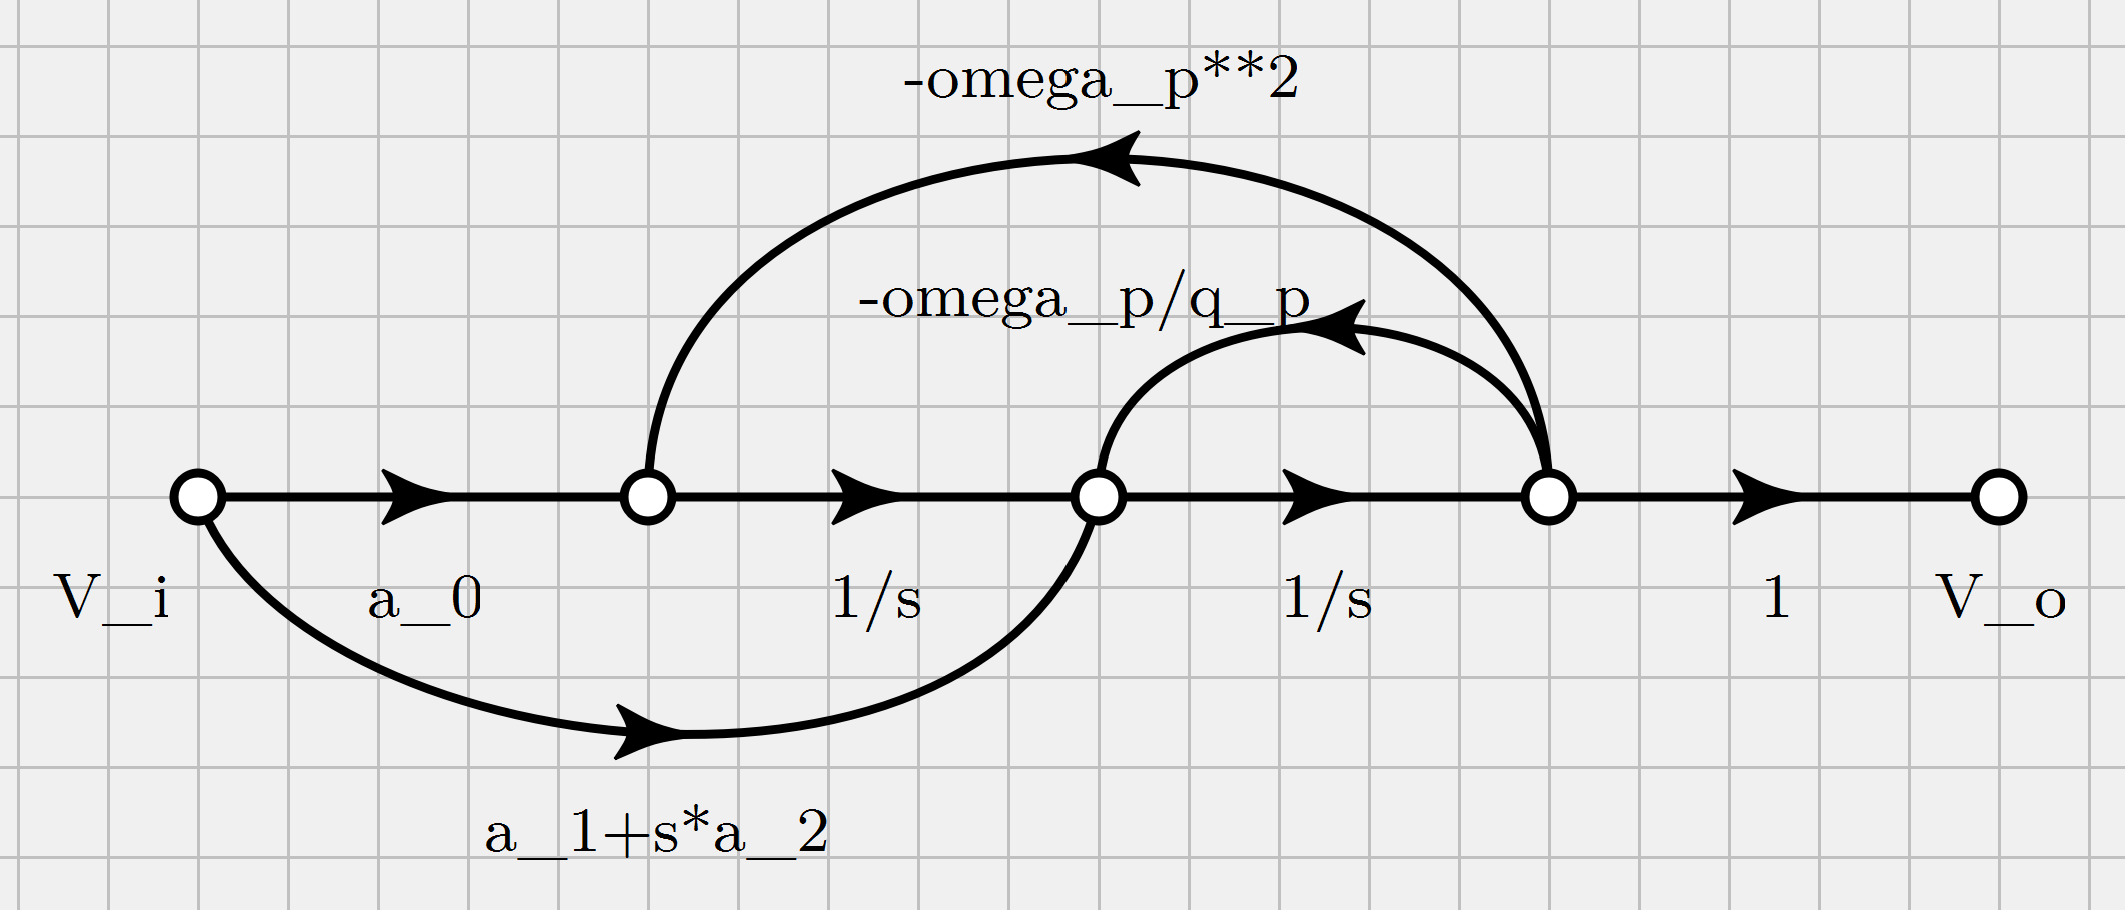

## Nice vector graphics for documentation / Jupyter notebooks
If you want it to look nicer, save as TikZ, translate with pdflatex to a pdf, and if you need it, make an svg from it with pdf2svg:

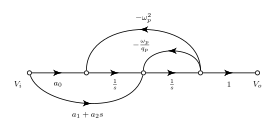

In [2]:
import IPython.display
IPython.display.SVG(filename='sfg.svg')

## Evaluate Mason in signalflowgrapher and paste code to Jupyter notebook

In [3]:
import sympy as sp
Delta = sp.symbols('Delta')
L1,L2 = sp.symbols('L1,L2')
T_num = sp.symbols('T_num')
T_den = sp.symbols('T_den')
T_io = sp.symbols('T_io')
q_p,a_0,omega_p,a_1,a_2,s = sp.symbols('q_p,a_0,omega_p,a_1,a_2,s')

loops = [(L1, -omega_p**2/s**2), (L2, -omega_p/(q_p*s))]
determinant = [(Delta, -L1 - L2 + 1)]
denominator = [(T_den, Delta)]

P1,D1,P2,D2 = sp.symbols('P1,D1,P2,D2')
paths = [(P1, (a_1 + a_2*s)/s), (D1, 1), (P2, a_0/s**2), (D2, 1)]
numerator = [(T_num, D1*P1 + D2*P2)]

transfer_function = [(T_io, T_num/T_den)]
T=T_io.subs(transfer_function).subs(numerator).subs(denominator).subs(determinant).subs(paths).subs(loops).simplify()
display(T)

qₚ⋅(a₀ + s⋅(a₁ + a₂⋅s))
───────────────────────
   2                 2 
 ωₚ ⋅qₚ + ωₚ⋅s + qₚ⋅s  

Nicer expression:

In [4]:
n, d = fraction(T)
n = (n/q_p).expand().collect(s)
d = (d/q_p).expand()
n/d

                2
a₀ + a₁⋅s + a₂⋅s 
─────────────────
   2   ωₚ⋅s    2 
 ωₚ  + ──── + s  
        qₚ       

## Insert numbers and plot bode diagram

In [5]:
import numpy as np

In [6]:
target = [(a_0,1),(a_1,0),(a_2,0),(omega_p,1),(q_p,5)]
wn = 10.0**np.arange(-2,2,0.01)

In [7]:
w = symbols('omega', real=true)
tn = lambdify(w, T.subs(s, I*w).subs(target), 'numpy')

In [8]:
T_a = np.abs(tn(wn))
T_p = np.unwrap(np.angle(tn(wn)))/np.pi*180

In [9]:
import matplotlib.pyplot as plt

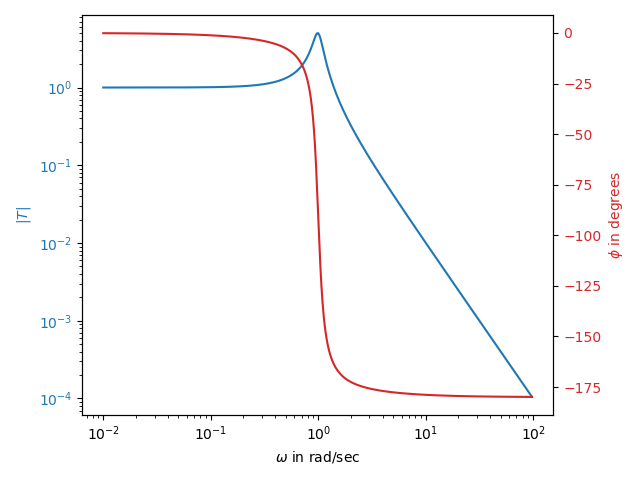

In [10]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('$\omega$ in rad/sec')
ax1.set_ylabel('$|T|$', color=color)
ax1.loglog(wn, T_a, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('$\phi$ in degrees', color=color)  # we already handled the x-label with ax1
ax2.plot(wn, T_p, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()